# Article similarity

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import nltk
from itertools import combinations
import os
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt


In [2]:
base_dir = '/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/'
articles_dir = 'Assignment 3 Articles'
books_dir = 'Assignment 3 Books'

# Defining Functions

In [3]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

# Choosing 'N' for N Grams

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 21. We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

## Running for Books

In [17]:
ax = []
ay = []
yall = []

for n in range(2,21):
        
    books_comparison = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    ax.append(n)
    yall.append(a*100)
    ay.append(a.mean()*100)

Plotting the distributions

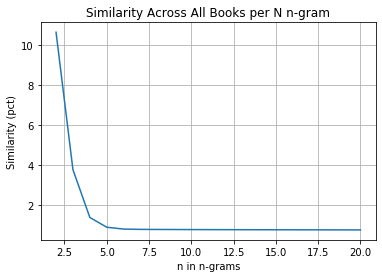

In [18]:
plt.plot(ax,ay, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

Here we have to choose a point of inflection or a point of separation or boundary that clearly differentiates between "too similar" and "not at all similar"  documents. We observe that the point of inflection is somewhere at n = 4 or n = 5. I will be going with n = 4 since that is where we notice an elbow. It has to be noted that the levels of similarity reaches to zero with long grams. 
Hence N=4 is chosen.

## Running for Articles

In [19]:
bx = []
by = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    bx.append(n)
    yall.append(a*100)
    by.append(a.mean()*100)

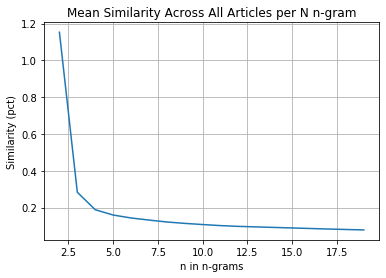

In [21]:
plt.plot(bx,by, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

We should be looking out for the inflection point or a point of separation between too similar and not enough similarity(almost flat line). This is where we are optimally able to find similarity between different documents or artciles in this case. Therefore we choose  N=3 . 
It is quite obvious that a N-grams model with N=2 won't be  eliminating enough pairs but a N-grams model with N=3 seems to ride the line.

It's quite interesting to note that the 'N' for books turned out to be longer than the articles as books are longer pieces of documents and therefore a larger 'N' is needed to capture the similarity between them. It is little surprising to notice that the 'N' value is just one number or unit more for books in comparison to articles which indicates that the books may not be much larger compared to artciles in our case.

Hence N=3 is chosen

# Books measuring similarity

After having our n for books chosen as 4, we'll examine the similairty of our set of books, and use a threshold value of 0.0050( we need to look at the graph to find the inflection point and then find the threshold). This threshold value will filter our any books with similarities below that value, in order to allow us to focus on the most promininent combinations of books that are similar.

We have chosen a threshold value of 0.0050 which is much higher than the value corresponding to the '4' in N-grams(0.0015) on the graph is because we want to  look out for the books that are similar. At the threshold value of 0.0015 we only get the books that are neither similar nor dissimilar. That is the reason a threshold value of 0.0050 is chosen.

In [22]:
books_comparison = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Books/',ngram_size=4,threshold=0.0050)

for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%


Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444%


Return_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.430%




In [23]:
books_similar_n4 = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Books/',ngram_size=4,threshold=0.0050)
books_similar_n4

{'Adventures_of_Sherlock_Holmes.txt,Return_of_Sherlock_Holmes.txt': 0.023318951117719297,
 'Adventures_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt': 0.024436600597339125,
 'Return_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt': 0.0243031158295003}

In [24]:
ay[4]

0.7930029081702493

In [25]:
ay[1]

3.7697336466527895

It turns out all the sherlock holmes were similar to each other.

# Books measuring Dissimilarity or Dissimilar books

we chose here 0.000027 as a threshold to find the dissimilar books although our N-grams value is 4 because we want to find the documents that are extremely dissimilar on the other end of the spectrum. At 0.0015 corresponding to the value of the 4 in 'N-grams' , we will only find the documents are on the verge of being similar and also dissimilar.

In [96]:
ay[17]

0.0008270230348161322

In [97]:
ay[4]

0.0015350613146298039

In [31]:
books_comparison = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Books/',ngram_size=4,threshold=0.000027)

for k,v in sorted(books_comparison.items() , key = lambda kv:kv[1],reverse = False):
    book1, book2 = k.split(',')
    dissimilarity_index = v 
    print (str(book1) + " is dissimilar to " + str(book2) + 
           " with a Dissimilarity Index of " + '{percent:.3%}'.format(percent=dissimilarity_index) +"\n" +"\n")

Hound_of_the_Baskervilles.txt is dissimilar to 3boat10.txt with a Dissimilarity Index of 0.292%


Return_of_Sherlock_Holmes.txt is dissimilar to 3boat10.txt with a Dissimilarity Index of 0.356%


Adventures_of_Sherlock_Holmes.txt is dissimilar to 3boat10.txt with a Dissimilarity Index of 0.397%


Adventures_of_Sherlock_Holmes.txt is dissimilar to Return_of_Sherlock_Holmes.txt with a Dissimilarity Index of 2.332%


Return_of_Sherlock_Holmes.txt is dissimilar to Hound_of_the_Baskervilles.txt with a Dissimilarity Index of 2.430%


Adventures_of_Sherlock_Holmes.txt is dissimilar to Hound_of_the_Baskervilles.txt with a Dissimilarity Index of 2.444%




Now we see a totally different sequence of books comparisons while measuring dissimilarity

# Articles measuring similarity

After having our n for articles chosen as 3, we'll examine the similairty of our set of articles, and use a threshold value of 0.085 in order to get the top 5 similar articles. This threshold value will filter our any articles with similarities below that value, in order to allow us to focus on the most promininent combinations of articles that are similar.

In [32]:
articles_comparison = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/',ngram_size=3,threshold=0.085)

for k,v in sorted(articles_comparison.items() , key = lambda kv:kv[1],reverse = True):
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index))

article17.txt is similar to article16.txt with a Similarity Index of 72.589%
article10.txt is similar to article13.txt with a Similarity Index of 21.798%
article4.txt is similar to article3.txt with a Similarity Index of 13.592%
article26.txt is similar to article28.txt with a Similarity Index of 9.790%
article31.txt is similar to article28.txt with a Similarity Index of 8.621%


In [33]:
by[1]

0.2829374875878607

In [34]:
by[3]

0.1592294039682459

In [35]:
article_similar_n3 = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', ngram_size=3,threshold=0.085)
article_similar_n3

{'article31.txt,article28.txt': 0.08620689655172414,
 'article26.txt,article28.txt': 0.0979020979020979,
 'article10.txt,article13.txt': 0.21798365122615804,
 'article17.txt,article16.txt': 0.7258883248730964,
 'article4.txt,article3.txt': 0.13592233009708737}

In [36]:
df = pd.DataFrame({'compare':list(article_similar_n3.keys()), 'similarity':list(article_similar_n3.values())})
df.sort_values('similarity', ascending=False).head(5)

,compare,similarity
3,"article17.txt,article16.txt",0.725888
2,"article10.txt,article13.txt",0.217984
4,"article4.txt,article3.txt",0.135922
1,"article26.txt,article28.txt",0.097902
0,"article31.txt,article28.txt",0.086207


From the above sequence , it looks like article 17 and artcile 16 are the most similar.We have to validate this similarity claim by looking at the raw text. 



In [37]:
with open(os.path.join('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', 'article17.txt')) as f:
    print(f.read())
    
with open(os.path.join('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', 'article16.txt')) as f:
    print(f.read())

A study group said the United States
should increase its strategic petroleum reserve to one mln
barrels as one way to deal with the present and future impact
of low oil prices on the domestic oil industry.
    U.S. policy now is to raise the strategic reserve to 750
mln barrels, from its present 500 mln, to help protect the
economy from an overseas embargo or a sharp price rise.
    The Aspen Institute for Humanistic Studies, a private
group, also called for new research for oil exploration and
development techniques.
    It predicted prices would remain at about 15-18 dlrs a
barrel for several years and then rise to the mid 20s, with
imports at about 30 pct of U.S. consumption.
    The study cited two basic policy paths for the nation: to
protect the U.S. industry through an import fee or other such
device or to accept the full economic benefits of cheap oil.
    But the group did not strongly back either option, saying
there were benefits and drawbacks to both.
    It said instead th

They are almost the same article except for the fact that article 17 has few extra paragraphs placed in between . So are results looks technically correct.

Now lets look at the fifth most similar article which are article 31 and article 28

In [38]:
with open(os.path.join('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', 'article31.txt')) as f:
    print(f.read())
    
with open(os.path.join('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', 'article28.txt')) as f:
    print(f.read())

A group of affiliated Miami-based
investment firms led by Fundamental Management Corp said it
raised its stake in Robeson Industries Corp to 238,000 shares,
or 14.6 pct of the total, from 205,000 or 12.8 pct.
    In a filing with the Securities and Exchange Commission,
the group said it bought 32,800 Robeson common shares between
Jan 26 and Feb 9 for 175,691 dlrs.
    The group said it may buy more shares and plans to study
Robeson's operations. Afterwards it may recommend that
management make changes in its operations. Fundamental
Management Chairman Carl Singer was recently elected to the
Robeson board.
 Reuter

Industrial Equity (Pacific) Ltd, a
Hong Kong investment firm, said it raised its stake in Wrather
Corp to 816,000 shares, or 11.3 pct of the total outstanding
common stock, from 453,300 shares, or 6.3 pct.
    In a filing with the Securities and Exchange Commission,
Industrial Equity, which is principally owned by Brierley
Investments Ltd, a publicly held New Zealand company,

We see almost NO similarity between these article 31 and 28 except for like few words here and there as predicted by our n-grams model.

# Articles measuring Dissimilarity or Dissimilar Articles

we chose here 0.00711 as a threshold to find the dissimilar articles although our N-grams value is 3 for dealing with articles because we want to find the documents that are extremely dissimilar on the other end of the spectrum. At 0.012 corresponding to the value of the 3 in 'N-grams' , we will only find the documents are on the verge of being similar and also dissimilar. Hence a threshold value of 0.00711 is chosen to find dissimilar articles.

In [39]:
by[17]

0.07833355287732437

In [40]:
by[3]

0.1592294039682459

In [41]:
articles_comparison_reverse = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/',ngram_size=3,threshold=0.00711)

for k,v in sorted(articles_comparison_reverse.items() , key = lambda kv:kv[1],reverse = False):
    art1, art2 = k.split(',')
    dissimilarity_index_articles = v
    print (str(art1) + " is disimilar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=dissimilarity_index_articles))

article26.txt is disimilar to article21.txt with a Similarity Index of 0.763%
article25.txt is disimilar to article37.txt with a Similarity Index of 0.769%
article30.txt is disimilar to article37.txt with a Similarity Index of 0.833%
article22.txt is disimilar to article5.txt with a Similarity Index of 0.922%
article22.txt is disimilar to article37.txt with a Similarity Index of 0.939%
article30.txt is disimilar to article26.txt with a Similarity Index of 1.010%
article26.txt is disimilar to article36.txt with a Similarity Index of 1.136%
article30.txt is disimilar to article25.txt with a Similarity Index of 1.266%
article8.txt is disimilar to article14.txt with a Similarity Index of 1.277%
article11.txt is disimilar to article10.txt with a Similarity Index of 1.301%
article4.txt is disimilar to article1.txt with a Similarity Index of 1.307%
article1.txt is disimilar to article3.txt with a Similarity Index of 1.429%
article37.txt is disimilar to article21.txt with a Similarity Index of

In [42]:
article_dissimilar_n3 = compare_files('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', ngram_size=3,threshold=0.00711)
article_dissimilar_n3

{'article8.txt,article14.txt': 0.01276595744680851,
 'article18.txt,article4.txt': 0.02857142857142857,
 'article18.txt,article1.txt': 0.03680981595092025,
 'article18.txt,article3.txt': 0.031496062992125984,
 'article30.txt,article25.txt': 0.012658227848101266,
 'article30.txt,article26.txt': 0.010101010101010102,
 'article30.txt,article37.txt': 0.008333333333333333,
 'article30.txt,article21.txt': 0.021834061135371178,
 'article31.txt,article26.txt': 0.08,
 'article31.txt,article32.txt': 0.021505376344086023,
 'article31.txt,article28.txt': 0.08620689655172414,
 'article25.txt,article37.txt': 0.007692307692307693,
 'article26.txt,article32.txt': 0.025974025974025976,
 'article26.txt,article36.txt': 0.011363636363636364,
 'article26.txt,article21.txt': 0.007633587786259542,
 'article26.txt,article28.txt': 0.0979020979020979,
 'article32.txt,article28.txt': 0.027777777777777776,
 'article36.txt,article35.txt': 0.018867924528301886,
 'article22.txt,article37.txt': 0.009389671361502348,


In [43]:
df_dissimilar = pd.DataFrame({'compare':list(article_dissimilar_n3.keys()), 'Dissimilarity':list(article_dissimilar_n3.values())})
df_dissimilar.sort_values('Dissimilarity', ascending=True).head(5)

,compare,Dissimilarity
14,"article26.txt,article21.txt",0.007634
11,"article25.txt,article37.txt",0.007692
6,"article30.txt,article37.txt",0.008333
19,"article22.txt,article5.txt",0.009217
18,"article22.txt,article37.txt",0.009390


It looks like article 26 and article 21 are the most dissimilar. We can only validate that result by looking  at the raw text

In [44]:

with open(os.path.join('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', 'article26.txt')) as f:
    print(f.read())
    
with open(os.path.join('/Users/mohammedhussain/Desktop/UCHICAGO assigments/NLP/asssignment 3/Assignment 3 Articles/', 'article21.txt')) as f:
    print(f.read())

A group of affiliated New York
investment firms said they lowered their stake in Cyclops Corp
to 260,500 shares, or 6.4 pct of the total outstanding common
stock, from 370,500 shares, or 9.2 pct.
    In a filing with the Securities and Exchange Commission,
the group, led by Mutual Shares Corp, said it sold 110,000
Cyclops common shares on Feb 17 and 19 for 10.0 mln dlrs.
 Reuter

Computer Terminal Systems Inc said
it has completed the sale of 200,000 shares of its common
stock, and warrants to acquire an additional one mln shares, to
<Sedio N.V.> of Lugano, Switzerland for 50,000 dlrs.
    The company said the warrants are exercisable for five
years at a purchase price of .125 dlrs per share.
    Computer Terminal said Sedio also has the right to buy
additional shares and increase its total holdings up to 40 pct
of the Computer Terminal's outstanding common stock under
certain circumstances involving change of control at the
company.
    The company said if the conditions occur the war

We see absolutely no similarity between the articles of 26 and 21, so our N-grams model has yielded accurate results